In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import time
from scipy.stats import shapiro, mannwhitneyu

In [2]:
experiments = glob.glob("C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/benchmark_runs/*")

FORM = "%H:%M:%S.%f"
PARAMETERS = ["lpid", "lpps", "rpid", "rpps", "spps"]
FULL_PARAMETR_NAME = { "lpid": "livenessProbeInitialDelay", 
                       "lpps": "livenessProbePeriodSeconds", 
                       "rpid": "readinessProbeInitialDelay", 
                       "rpps": "readinessProbePeriodSeconds", 
                       "spps": "startupProbe.periodSeconds"}

In [12]:
for param in PARAMETERS:
    print(param)
    datasets = ["no_monitoring", "default_prometheus"]

    # Find all experiments in group
    for experiment in experiments:
        if param in experiment:
            datasets.append(experiment.split("\\")[1])

    # Order experiments
    numbers = []
    for d in datasets:
        if d not in ["no_monitoring", "default_prometheus"]:
            numbers.append(int(d.split("_")[1]))
    numbers.sort(reverse=True)
    t = [f"{param}_{i}" for i in numbers]
    order = ["no_monitoring", "default_prometheus"]
    order.extend(t)

    # Create combined dataframe
    com_df = None
    for i, dataset in enumerate(order):
        df = pd.read_csv(f"C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/benchmark_runs/{dataset}/clean_df.csv")
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

        columns_to_update = ["creation", "execution", "deletion", "tpstart", "tpdataframe", "tpfinished"]
        for _ in columns_to_update:
            updated_values = []
            for row in df[_]:
                h,m,s = row.split(":")
                s = s.split(".")[0]
                total_s = (int(h) * 3600) + (int(m) * 60) + int(s)
                updated_values.append(total_s)
            df[f"{_}_seconds"] = updated_values

        df["execution_remainder"] = df["execution_seconds"] - df["tpstart_seconds"] - df["tpdataframe_seconds"] - df["tpfinished_seconds"]
        df['total'] = df["creation_seconds"] + df["execution_seconds"]  + df["deletion_seconds"]
        df["id"] = f"{i}_{dataset}"
        df["order"] = i

        if i == 0:
            com_df = df
        else:
            com_df = com_df._append(df, ignore_index=True)

    comp = com_df[["total", "id"]]
    # print(comp)

    res = {}
    for i in com_df["id"].unique(): #["0_no_monitoring", "1_default_prometheus", "2_lpid_20", "3_lpid_10", "4_lpid_5"]:
        rows = comp.loc[comp['id'] == i]
        res[i] = rows["total"].tolist()
        print(shapiro(rows["total"].tolist()))
    
    try:
        print(com_df["id"].unique()[4])
        _, pnorm = mannwhitneyu(res["1_default_prometheus"], res[com_df["id"].unique()[4]], method="asymptotic")
        print(pnorm)
    except Exception as e:
        print(e)
    # # selected_combined = ["creation_seconds", "tpstart_seconds", "tpdataframe_seconds", "tpfinished_seconds", "execution_remainder", "deletion_seconds", "order", "id"]
    # # average_df = com_df[selected_combined]
    # # average_df = average_df.sort_values('order')
    # com_df.rename(index={"default_prometheus": "_default_prometheus", "no_monitoring": "_no_monitoring"})
    # ax = com_df.boxplot(column="total", rot=90, by="id")
    # # Add Title and Labels
    # plt.title(f"{param} total in seconds")
    # plt.xlabel("Experiment settings")
    # plt.ylabel("Time (s)")
    # plt.xticks([1,2,3,4,5], order)
    # plt.suptitle('')
    # plt.tight_layout()    
    # plt.savefig(f"benchmark_runs/comparison/total_{param}.png")

    # print(com_df.groupby("id")["total"].describe())

lpid
ShapiroResult(statistic=0.6331236362457275, pvalue=0.0001376410509692505)
ShapiroResult(statistic=0.7033029794692993, pvalue=0.000515834370162338)
ShapiroResult(statistic=0.9375052452087402, pvalue=0.5256018042564392)
ShapiroResult(statistic=0.9449317455291748, pvalue=0.6090724468231201)
ShapiroResult(statistic=0.8904683589935303, pvalue=0.1716478019952774)
4_lpid_5
0.20156890651376047
lpps
ShapiroResult(statistic=0.6331236362457275, pvalue=0.0001376410509692505)
ShapiroResult(statistic=0.7033029794692993, pvalue=0.000515834370162338)
ShapiroResult(statistic=0.9529699683189392, pvalue=0.7036932706832886)
ShapiroResult(statistic=0.9796406626701355, pvalue=0.9632160663604736)
ShapiroResult(statistic=0.9182631373405457, pvalue=0.3426962196826935)
4_lpps_2
0.5010019895710105
rpid
ShapiroResult(statistic=0.6331236362457275, pvalue=0.0001376410509692505)
ShapiroResult(statistic=0.7033029794692993, pvalue=0.000515834370162338)
ShapiroResult(statistic=0.9294881820678711, pvalue=0.44287681

In [13]:
_, pnorm = mannwhitneyu(res["1_default_prometheus"], res["0_no_monitoring"], method="asymptotic")
print(pnorm)

0.9436045583585395


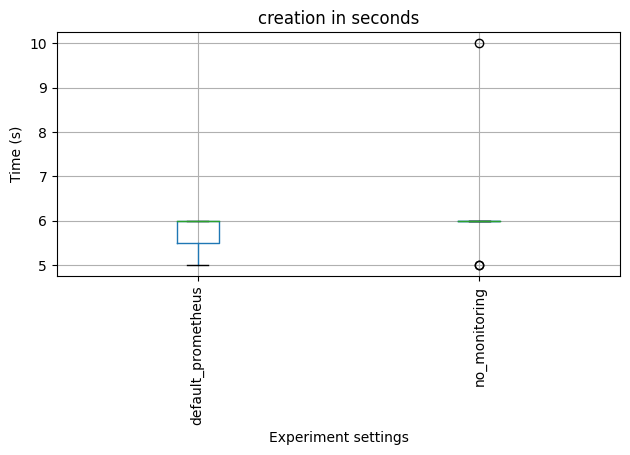

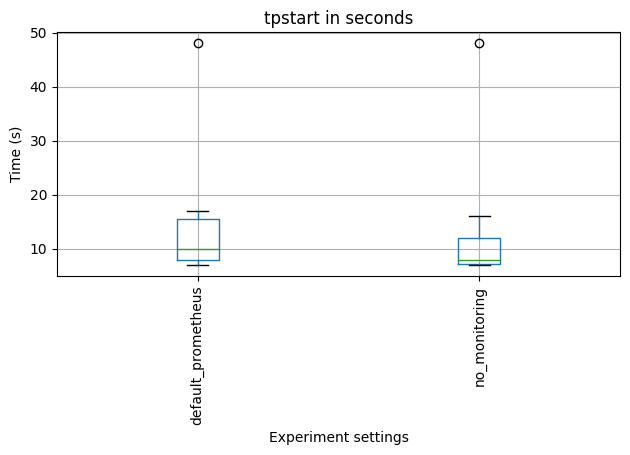

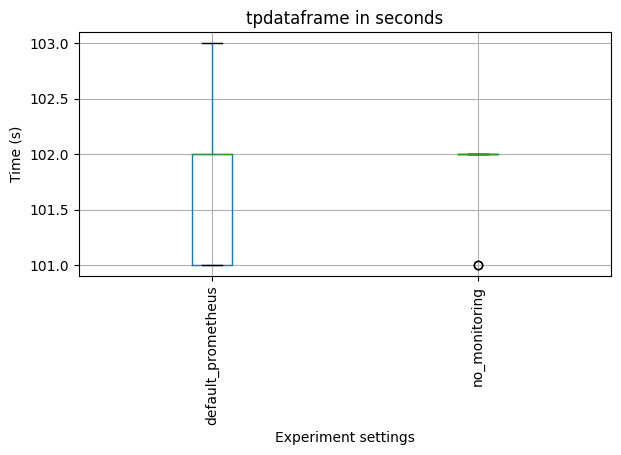

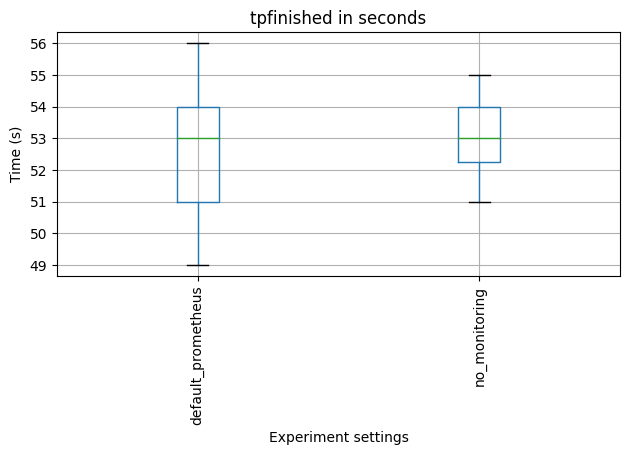

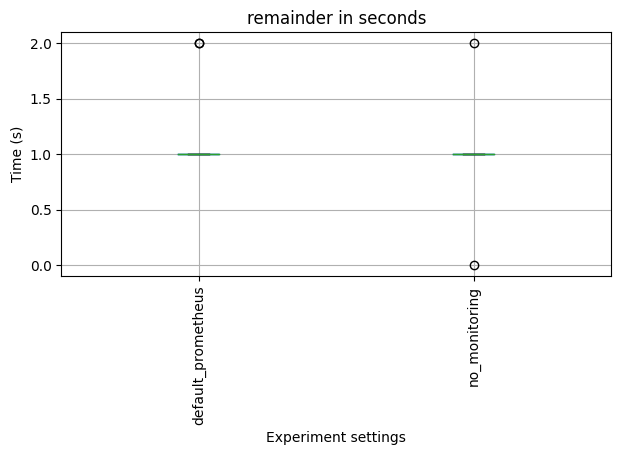

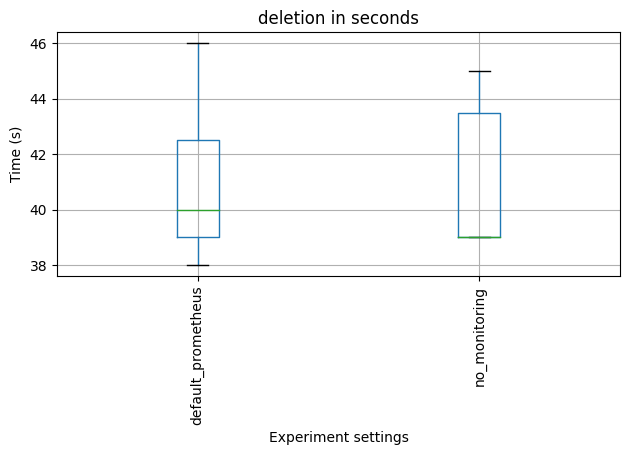

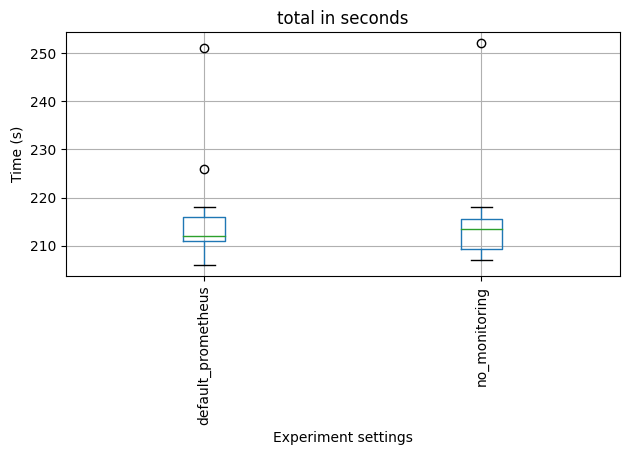

In [6]:
datasets = ["no_monitoring", "default_prometheus"]

# Create combined dataframe
com_df = None
for i, dataset in enumerate(datasets):
    df = pd.read_csv(f"C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/benchmark_runs/{dataset}/clean_df.csv")
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    columns_to_update = ["creation", "execution", "deletion", "tpstart", "tpdataframe", "tpfinished"]
    for _ in columns_to_update:
        updated_values = []
        for row in df[_]:
            h,m,s = row.split(":")
            s = s.split(".")[0]
            total_s = (int(h) * 3600) + (int(m) * 60) + int(s)
            updated_values.append(total_s)
        df[f"{_}_seconds"] = updated_values

    df["execution_remainder"] = df["execution_seconds"] - df["tpstart_seconds"] - df["tpdataframe_seconds"] - df["tpfinished_seconds"]
    df["id"] = dataset
    df['total'] = df["creation_seconds"] + df["execution_seconds"]  + df["deletion_seconds"]
    df["order"] = i

    if i == 0:
        com_df = df
    else:
        com_df = com_df._append(df, ignore_index=True)


selected_combined = ["creation_seconds", "tpstart_seconds", "tpdataframe_seconds", "tpfinished_seconds", "execution_remainder", "deletion_seconds", "order", "id", "total"]
average_df = com_df[selected_combined]
average_df = average_df.sort_values('order')

for col in ["creation_seconds", "tpstart_seconds", "tpdataframe_seconds", "tpfinished_seconds", "execution_remainder", "deletion_seconds", "total"]:
    ax = average_df.boxplot(column=col, rot=90, by="id")
    # Add Title and Labels
    title = col.split('_')[0] if col != "execution_remainder" else "remainder"
    plt.title(f"{title} in seconds")
    plt.xlabel("Experiment settings")
    plt.ylabel("Time (s)")
    plt.suptitle('')
    plt.tight_layout() 
    plt.savefig(f"benchmark_runs/comparison/{title}_benchmark.png")
    plt.show()   
    # plt.savefig(f"benchmark_runs/{param}_{col}.png")

In [6]:
datasets = ["no_monitoring", "default_prometheus", "final_settings"]

# Create combined dataframe
com_df = None
for i, dataset in enumerate(datasets):
    df = pd.read_csv(f"C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/benchmark_runs/{dataset}/clean_df.csv")
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    columns_to_update = ["creation", "execution", "deletion", "tpstart", "tpdataframe", "tpfinished"]
    for _ in columns_to_update:
        updated_values = []
        for row in df[_]:
            h,m,s = row.split(":")
            s = s.split(".")[0]
            total_s = (int(h) * 3600) + (int(m) * 60) + int(s)
            updated_values.append(total_s)
        df[f"{_}_seconds"] = updated_values

    df["execution_remainder"] = df["execution_seconds"] - df["tpstart_seconds"] - df["tpdataframe_seconds"] - df["tpfinished_seconds"]
    df['total'] = df["creation_seconds"] + df["execution_seconds"]  + df["deletion_seconds"]
    df["id"] = f"{i}_{dataset}"
    df["order"] = i

    if i == 0:
        com_df = df
    else:
        com_df = com_df._append(df, ignore_index=True)

comp = com_df[["total", "id"]]

res = {}
for i in com_df["id"].unique():
    rows = comp.loc[comp['id'] == i]
    res[i] = rows["total"].tolist()
    print(shapiro(rows["total"].tolist()))

try:
    _, pnorm = mannwhitneyu(res["1_default_prometheus"], res["2_final_settings"], method="asymptotic")
    print(pnorm)
except Exception as e:
    print(e)

ShapiroResult(statistic=0.6331236362457275, pvalue=0.0001376410509692505)
ShapiroResult(statistic=0.7033029794692993, pvalue=0.000515834370162338)
ShapiroResult(statistic=0.6380728483200073, pvalue=7.497962542402092e-06)
0.11114822476662013


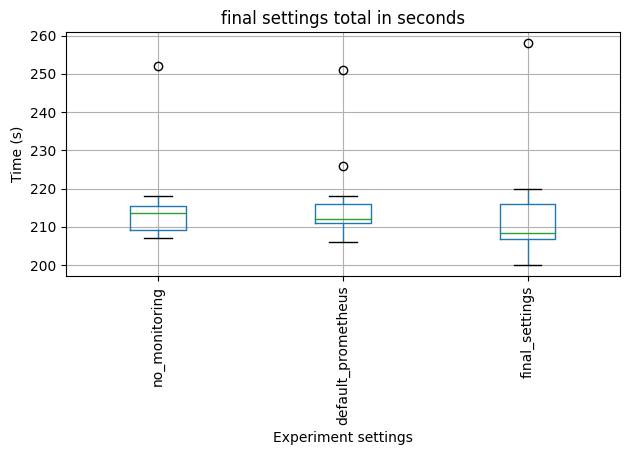

In [11]:
com_df.rename(index={"default_prometheus": "_default_prometheus", "no_monitoring": "_no_monitoring"})
ax = com_df.boxplot(column="total", rot=90, by="id")
# Add Title and Labels
plt.title(f"final settings total in seconds")
plt.xlabel("Experiment settings")
plt.ylabel("Time (s)")
plt.xticks([1,2,3], datasets)
plt.suptitle('')
plt.tight_layout()    
plt.savefig(f"benchmark_runs/comparison/total_final.png")

In [12]:
print(com_df.groupby("id")["total"].describe())

                      count        mean        std    min     25%    50%  \
id                                                                         
0_no_monitoring        10.0  216.000000  13.182480  207.0  209.25  213.5   
1_default_prometheus   11.0  216.636364  12.564018  206.0  211.00  212.0   
2_final_settings       20.0  212.150000  11.966070  200.0  206.75  208.5   

                        75%    max  
id                                  
0_no_monitoring       215.5  252.0  
1_default_prometheus  216.0  251.0  
2_final_settings      216.0  258.0  


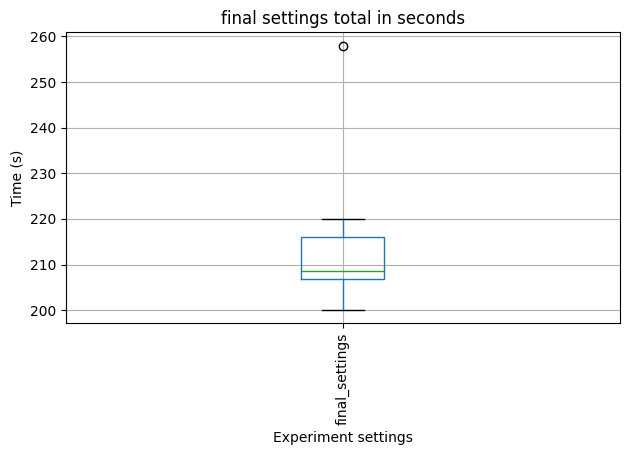

In [17]:
final_df = com_df.loc[com_df['id'] == "2_final_settings"]
ax = final_df.boxplot(column="total", rot=90, by="id")
# Add Title and Labels
plt.title(f"final settings total in seconds")
plt.xlabel("Experiment settings")
plt.ylabel("Time (s)")
plt.xticks([1], ["final_settings"])
plt.suptitle('')
plt.tight_layout()    
plt.savefig(f"benchmark_runs/final_settings/boxplot.png")

In [ ]:
ax = com_df.boxplot(column="total", rot=90, by="id")
# Add Title and Labels
plt.title(f"final settings total in seconds")
plt.xlabel("Experiment settings")
plt.ylabel("Time (s)")
plt.xticks([1,2,3], datasets)
plt.suptitle('')
plt.tight_layout()    
plt.savefig(f"benchmark_runs/comparison/total_final.png")